# EDA ON TITANIC DATASET

In [158]:
#importing libraries into python
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [160]:
test.shape

(418, 11)

In [161]:
survive=pd.read_csv('Titanic_survival.csv')
survive.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [162]:
survive.shape

(418, 2)

In [163]:
survive.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [164]:
data=test.merge(survive,how='inner')
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [165]:
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [166]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

# Dealing with missing values

In [167]:
#since cabin is unused in performing 
data=data.drop(['Cabin'],axis=1)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [168]:
#missing values of age
l1=[]
first_lett=list(data['Name'])
for i in first_lett:
    t1=i.split(',')[1]
    t2=t1.split('.')[0]
    l1.append(t2)
data['title']=l1

In [169]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,Mrs


In [170]:
# based on comparing with title the age is taken median
medi=data.groupby('title').Age.transform('median')
data.Age.fillna(medi,inplace=True)

In [171]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Survived       0
title          0
dtype: int64

In [172]:
# replacing the null values for Fare
data['Fare']=data['Fare'].fillna(np.median(data['Fare'].dropna()))
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
title          0
dtype: int64

In [173]:
data['Age']=data.Age.fillna(np.median(data['Age'].dropna()))
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
title          0
dtype: int64

In [174]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'title'],
      dtype='object')

# Survival Rate

In [175]:
#survival rate
data.Survived.value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

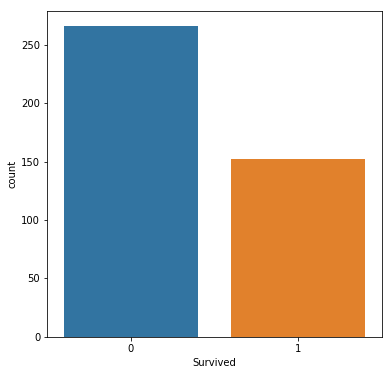

In [176]:
#in order to show the figure in appropriate size fig is used
fig, axes = plt.subplots(figsize=(6, 6))
sns.countplot('Survived',data=data)
plt.show()

Only 36% of the passengers were survived, where as a majority 63.6% of the passenger did not survive the disaster 

# Kind of passengers did not survive

In [177]:
#kind of passengers did not survive
data[data['Survived']==0].groupby(['Pclass'])['Survived'].count()

Pclass
1     57
2     63
3    146
Name: Survived, dtype: int64

In [178]:
d1=data[data['Survived']==0].groupby(['Embarked','Pclass','Sex'])['Survived'].count()
d1

Embarked  Pclass  Sex 
C         1       male     28
          2       male      7
          3       male     27
Q         2       male      4
          3       male     18
S         1       male     29
          2       male     52
          3       male    101
Name: Survived, dtype: int64

From the above analysis that the person do not survive is more in Embarked of 'S', Pclass of '3' and Sex is of 'Male' even thought from the analysis 'Male' was unsurvived

# EDA on significant Variables

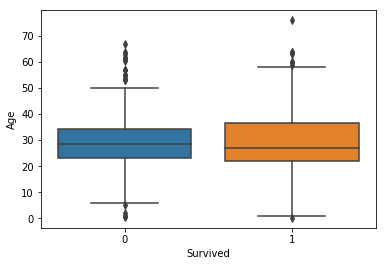

In [180]:
#EDA on significant variables
sns.boxplot(x='Survived',y='Age',data=data)
plt.show()

In [181]:
#unsurvival over sex
d3=data[data['Survived']==0].groupby(['Sex'])['Survived'].value_counts()
d3

Sex   Survived
male  0           266
Name: Survived, dtype: int64

from the above case that overall the 'Male' were unsurvived

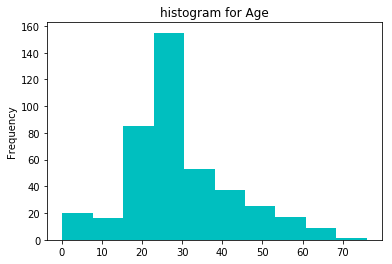

In [182]:
#the distribution of the age
data.Age.plot(kind='hist', title='histogram for Age',color='c')#x axis should be continuous in numeric
plt.show()

In [183]:
data['Age'].skew()

0.5509673048205881

The above distribution of age is a Right skewed data

In [184]:
#how many female and male travel in different pclass
pd.crosstab(data.Sex,data.Pclass)

Pclass,1,2,3
Sex,,,
female,50,30,72
male,57,63,146


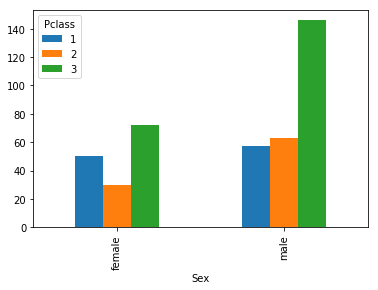

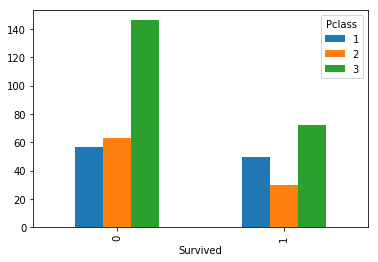

In [185]:
# Based on the Pclass the sex,survival rate is shown in bargraph
pd.crosstab(data.Sex,data.Pclass).plot(kind='bar')
plt.show()
pd.crosstab(data.Survived,data.Pclass).plot(kind='bar')
plt.show()

Huge amount of 'Male' is in the Pclass '3'and also unsurvived person are more in Pclass'3'

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


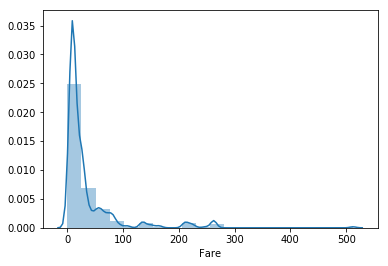

In [186]:
#Distribution of Fare
sns.distplot(data['Fare'],bins=20)
plt.show()

In [187]:
#correlation of the data
data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.026751,-0.053158,0.003818,0.043080,0.008633,-0.023245
Pclass,-0.026751,1.000000,-0.469571,0.001087,0.018721,-0.577313,-0.108615
Age,-0.053158,-0.469571,1.000000,-0.087452,-0.029193,0.335558,0.013579
SibSp,0.003818,0.001087,-0.087452,1.000000,0.306895,0.171912,0.099943
Parch,0.043080,0.018721,-0.029193,0.306895,1.000000,0.230325,0.159120
Fare,0.008633,-0.577313,0.335558,0.171912,0.230325,1.000000,0.192036
Survived,-0.023245,-0.108615,0.013579,0.099943,0.159120,0.192036,1.000000


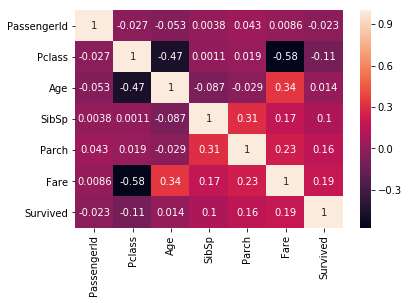

In [188]:
#using heatmap the correlation is shown
sns.heatmap(data.corr(),annot=True)
plt.show()

If the correlation is 'Positive' then the increase in one variable with respect to other increases .
If the correlation is 'Negative' then the increase in one variable with respect to decrease of other

From the above heatmap the 'Age' and 'Fare'  has higher correlation

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


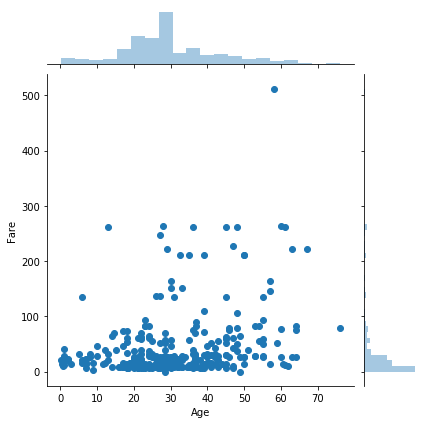

In [189]:
#using jointplot the age and fare is discribed
x=data['Age']
y=data['Fare']
sns.jointplot(x,y)
plt.show()

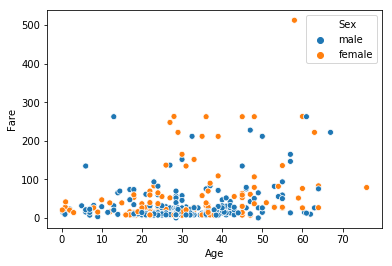

In [190]:
sns.scatterplot(x='Age',y='Fare',hue='Sex',data=data)
plt.show()

From the above case the age of between 50 to 60 has paid the Huge Fare and that Huge fare was paid by a 'female'